# Exploração de dados Xhospital

Trata-se de uma base de dados hospitalar....

<span style="color: var(--vscode-foreground);">Embora o Azure Data Studio gere automaticamente gráficos nos outputs, a ideia desta exploração é apenas responder as questões mencionadas.</span>

<span style="color: var(--vscode-foreground);">&gt; Créditos: Xperium Treinamentos</span>

In [2]:
SELECT 
    TOP(10) * 
FROM tab_classe_procedimento

(10 rows affected)

Total execution time: 00:00:00.005

cod_classe,classe
1,Classe 1
2,Classe 2
3,Classe 3
4,Classe 4
5,Classe 5
6,Classe 6
7,Classe 7
8,Classe 8
9,Classe 9
10,Classe 10


In [3]:
SELECT 
    TOP(10) * 
FROM tab_convenio

(10 rows affected)

Total execution time: 00:00:00.014

cod_convenio,convenio
1,Saúde+
2,Plano Bem-Estar
3,Vitalícia Saúde
4,Unicorp
5,Vida Plena
6,Saúde Fácil
7,Previna Saúde
8,Saúde Premier
9,Serenidade Saúde
10,Plano Vida Nova


In [4]:
SELECT 
    TOP(10) * 
FROM tab_internacoes

(10 rows affected)

Total execution time: 00:00:00.014

data_admissao,data_alta,tipo_alta,cod_paciente,numero_da_internacao,cod_medico,cod_procedimento,valor,acomodacao
2003-01-23 07:21:00.0000000,2003-01-23 17:35:00.0000000,Medica,1754,1,88,258,1825,Apartamento
2004-01-23 07:17:00.0000000,2004-01-23 07:50:00.0000000,Medica,634,1,88,258,1190,Apartamento
2004-01-23 07:55:00.0000000,2004-01-23 17:10:00.0000000,Medica,2351,1,88,258,109469,Apartamento
2004-01-23 08:05:00.0000000,2004-01-23 16:40:00.0000000,Medica,706,1,88,258,1510,Apartamento
2010-01-23 07:13:00.0000000,2010-01-23 17:20:00.0000000,Medica,822,1,88,258,1190,Apartamento
2011-01-23 07:17:00.0000000,2011-01-23 15:45:00.0000000,Medica,446,1,88,258,1715,Apartamento
2011-01-23 07:51:00.0000000,2011-01-23 17:45:00.0000000,Medica,1162,1,88,258,109469,Apartamento
2024-01-23 07:07:00.0000000,2024-01-23 17:15:00.0000000,Medica,707,1,88,258,1190,Apartamento
2025-01-23 07:02:00.0000000,2025-01-23 17:15:00.0000000,Medica,811,1,88,258,1734,Apartamento
2026-01-23 06:49:00.0000000,2026-01-23 16:00:00.0000000,Medica,2467,1,88,258,109469,Apartamento


In [5]:
SELECT 
    TOP(10) * 
FROM tab_medicos

(10 rows affected)

Total execution time: 00:00:00.018

cod_medico,medico
1,João Silva
2,Ana Oliveira
3,Pedro Santos
4,Maria Costa
5,André Pereira
6,Luana Almeida
7,Lucas Carvalho
8,Sofia Ferreira
9,Gabriel Rodrigues
10,Laura Martins


In [6]:
SELECT 
    TOP(10) * 
FROM tab_paciente

(10 rows affected)

Total execution time: 00:00:00.014

cod_paciente,nome_paciente,genero_paciente,data_nasc_paciente,cod_convenio
1,Paciente 1,F,1977-06-14 00:00:00.0000000,8
2,Paciente 2,F,1968-09-15 00:00:00.0000000,8
3,Paciente 3,F,1986-08-20 00:00:00.0000000,8
4,Paciente 4,F,1978-04-21 00:00:00.0000000,10
5,Paciente 5,F,1954-09-13 00:00:00.0000000,39
6,Paciente 6,F,1970-07-27 00:00:00.0000000,13
7,Paciente 7,F,1973-10-08 00:00:00.0000000,10
8,Paciente 8,F,1955-12-04 00:00:00.0000000,12
9,Paciente 9,F,2003-06-22 00:00:00.0000000,30
10,Paciente 10,F,1951-07-11 00:00:00.0000000,2


In [7]:
SELECT 
    TOP(10) * 
FROM tab_procedimento

(10 rows affected)

Total execution time: 00:00:00.015

cod_procedimento,procedimento,cod_classe
1,Procedimento 1,1
2,Procedimento 2,1
3,Procedimento 3,1
4,Procedimento 4,1
5,Procedimento 5,1
6,Procedimento 6,1
7,Procedimento 7,1
8,Procedimento 8,1
9,Procedimento 9,1
10,Procedimento 10,1


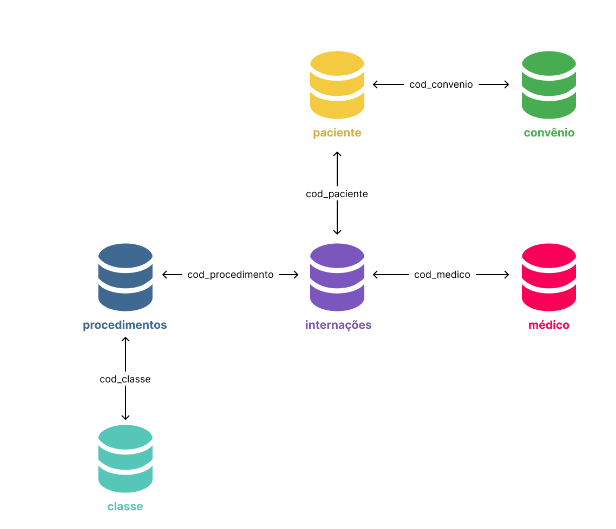

In [14]:
-- Quais as classes de procedimentos que mais realizamos na unidade?
SELECT TOP(5)
    tab_classe_procedimento.classe,
    COUNT(*) AS Total
FROM tab_internacoes
INNER JOIN tab_procedimento
ON tab_internacoes.cod_procedimento = tab_procedimento.cod_procedimento
INNER JOIN tab_classe_procedimento
ON tab_procedimento.cod_classe = tab_classe_procedimento.cod_classe
GROUP BY tab_classe_procedimento.classe
ORDER BY Total DESC

(5 rows affected)

Total execution time: 00:00:00.026

classe,Total
Classe 19,801
Classe 1,540
Classe 24,305
Classe 10,296
Classe 25,276


In [35]:
-- Quais convênios nos geram maior faturamento?
WITH Tab AS (
SELECT 
    tab_convenio.convenio,
    SUM(tab_internacoes.valor) AS Total
FROM tab_convenio
INNER JOIN tab_paciente
ON tab_convenio.cod_convenio = tab_paciente.cod_convenio
INNER JOIN tab_internacoes
ON tab_paciente.cod_paciente = tab_paciente.cod_paciente
GROUP BY tab_convenio.convenio
)
SELECT 
    convenio,
    Total,
    FORMAT(Total/SUM(Total)OVER(),'0.00%') AS Percentual
FROM Tab
ORDER BY Total DESC

(57 rows affected)

Total execution time: 00:00:00.026

convenio,Total,Percentual
Plano Bem-Estar,4756431046680,"20,08%"
Plano Vida Nova,4606691550766,"19,45%"
Saúde+,3241419676256,"13,69%"
Vitalícia Saúde,3144529414194,"13,28%"
Saúde Premier,1981846269450,"8,37%"
BemSaúde,810354919064,"3,42%"
Integral Saúde,563725161088,"2,38%"
Viva Mais Saúde,563725161088,"2,38%"
Saúde Consciente,519684132878,"2,19%"
Saúde Fácil,510875927236,"2,16%"


In [17]:
-- Qual a taxa de mortalidade?
SELECT tab_convenio.cod_convenio FROM tab_convenio

(57 rows affected)

Total execution time: 00:00:00.022

cod_convenio,convenio
1,Saúde+
2,Plano Bem-Estar
3,Vitalícia Saúde
4,Unicorp
5,Vida Plena
6,Saúde Fácil
7,Previna Saúde
8,Saúde Premier
9,Serenidade Saúde
10,Plano Vida Nova


In [ ]:
-- Qual é o TMP (Tempo Médio de Permanência) dos pacientes?


In [ ]:
-- Qual o número de Admissões?


In [ ]:
-- Qual o número de Altas?